<a href="https://colab.research.google.com/github/padmapraba/AutoML-Packages/blob/main/TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tpot

In [5]:
from tpot import TPOTClassifier
import sklearn.datasets
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, roc_curve, roc_auc_score
from sklearn.datasets import make_moons, make_circles, make_classification, load_breast_cancer
import numpy as np

### Step 1: Create an instance of TPOT

In [6]:
circle = TPOTClassifier()
moon = TPOTClassifier()
linear = TPOTClassifier()
cancer = TPOTClassifier()

### Step 2: Data

In [7]:
# Circles
circles_X, circles_y = sklearn.datasets.make_circles(noise=0.2, random_state=1, factor=0.5)
X_circ_train, X_circ_test, y_circ_train, y_circ_test = sklearn.model_selection.train_test_split(circles_X,circles_y,random_state=31)

### Step 3: Optimize pipeline for Data

In [8]:
circle.fit(X_circ_train, y_circ_train)
print(circle.score(X_circ_test, y_circ_test))


0.92


In [10]:
pred_prob = circle.predict_proba(X_circ_test)
# roc & auc
fpr_circ, tpr_circ, thresh_circ = roc_curve(y_circ_test, pred_prob[:,1],pos_label=1)
auc_score_cancer = roc_auc_score(y_circ_test, pred_prob[:,1])


# Moons

In [11]:
# Create Moons dataset and split into test and train
moons_X, moons_y = sklearn.datasets.make_moons(noise=0.3, random_state=0)
X_moon_train, X_moon_test, y_moon_train, y_moon_test = sklearn.model_selection.train_test_split(moons_X,moons_y,random_state=31)

# fit the data to the model
moon.fit(X_moon_train, y_moon_train)

# results of the model obtained by TPOT
print(moon.score(X_moon_test, y_moon_test))



0.84


In [12]:
pred_prob = moon.predict_proba(X_moon_test)
# roc & auc
fpr_moon, tpr_moon, thresh_moon = roc_curve(y_moon_test, pred_prob[:,1],pos_label=1)
auc_score_moon = roc_auc_score(y_moon_test, pred_prob[:,1])

# Linearly Separable

In [13]:
# Linearly Separable
lin_X, lin_y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)
rng = np.random.RandomState(2)
lin_X += 2 * rng.uniform(size=lin_X.shape)

X_lin_train, X_lin_test, y_lin_train, y_lin_test = sklearn.model_selection.train_test_split(lin_X,lin_y,random_state=31)

# fit the data to the model
linear.fit(X_lin_train, y_lin_train)

# results of the model obtained by TPOT
print(linear.score(X_lin_test, y_lin_test))





0.96


In [14]:
pred_prob = linear.predict_proba(X_lin_test)
# roc & auc
fpr_lin, tpr_lin, thresh_lin = roc_curve(y_lin_test, pred_prob[:,1],pos_label=1)
auc_score_linear = roc_auc_score(y_lin_test, pred_prob[:,1])

# Breast Cancer Dataset

In [15]:
# Breaset Cancer Dataset

# load data and split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, stratify=y, random_state=0)

# fit the data to the model
cancer.fit(X_train, y_train)

# results of the model obtained by TPOT
print(cancer.score(X_test, y_test))



0.972027972027972


In [16]:
pred_prob = cancer.predict_proba(X_test)
# roc & auc
fpr_cancer, tpr_cancer, thresh_cancer = roc_curve(y_test, pred_prob[:,1],pos_label=1)
auc_score_cancer = roc_auc_score(y_test, pred_prob[:,1])

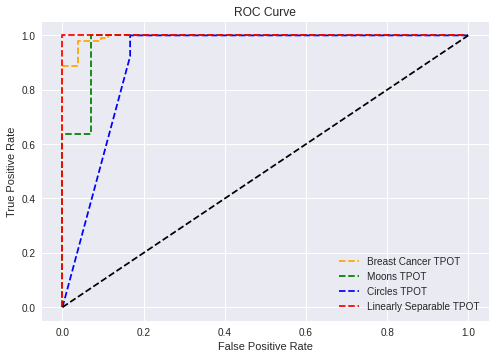

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')



# roc curve for tpr = fpr 
rand_prob= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, rand_prob,pos_label=1)


# plot roc curves
plt.plot(fpr_cancer, tpr_cancer, linestyle='--', color='orange',label= 'Breast Cancer TPOT')
plt.plot(fpr_moon, tpr_moon, linestyle='--', color='green',label= 'Moons TPOT')
plt.plot(fpr_circ, tpr_circ, linestyle='--', color='blue',label= 'Circles TPOT')
plt.plot(fpr_lin, tpr_lin, linestyle='--', color='red',label= 'Linearly Separable TPOT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()
